In [ ]:
# Import the pandas library
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

# Show the first few rows of the data
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [ ]:
# Check the column names
df.columns


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [ ]:
# Clean column names to make them easier to use
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()


,region,date,frequency,estimated_unemployment_rate_%,estimated_employed,estimated_labour_participation_rate_%,region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


/tmp/ipython-input-2995624700.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date'] = pd.to_datetime(df['date'])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


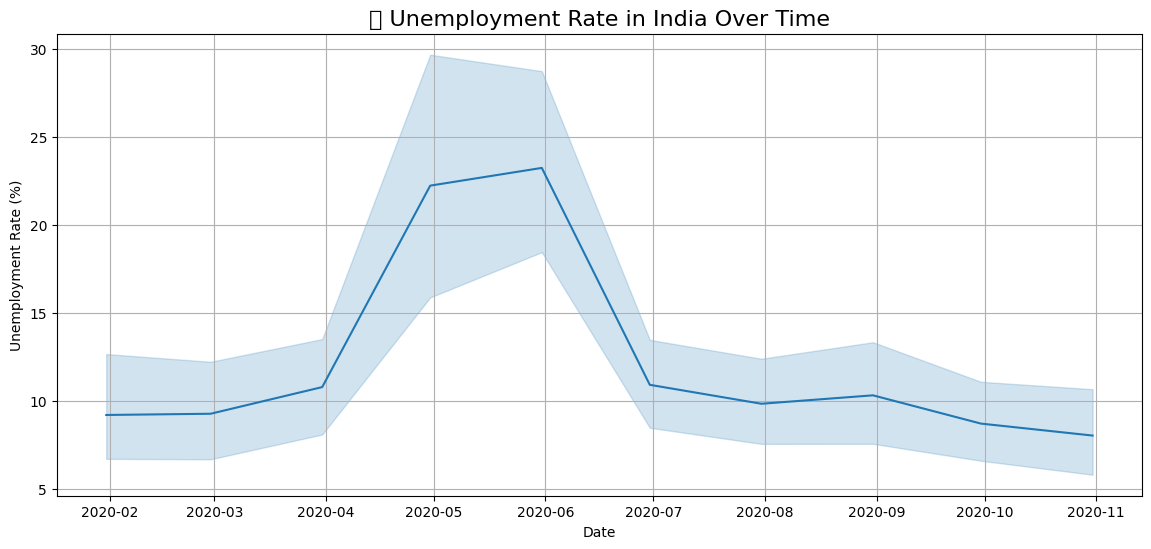

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a line plot of unemployment over time
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='date', y='estimated_unemployment_rate_%')
plt.title('📈 Unemployment Rate in India Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()


/tmp/ipython-input-4012645643.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_unemployment.values, y=region_unemployment.index, palette='viridis')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


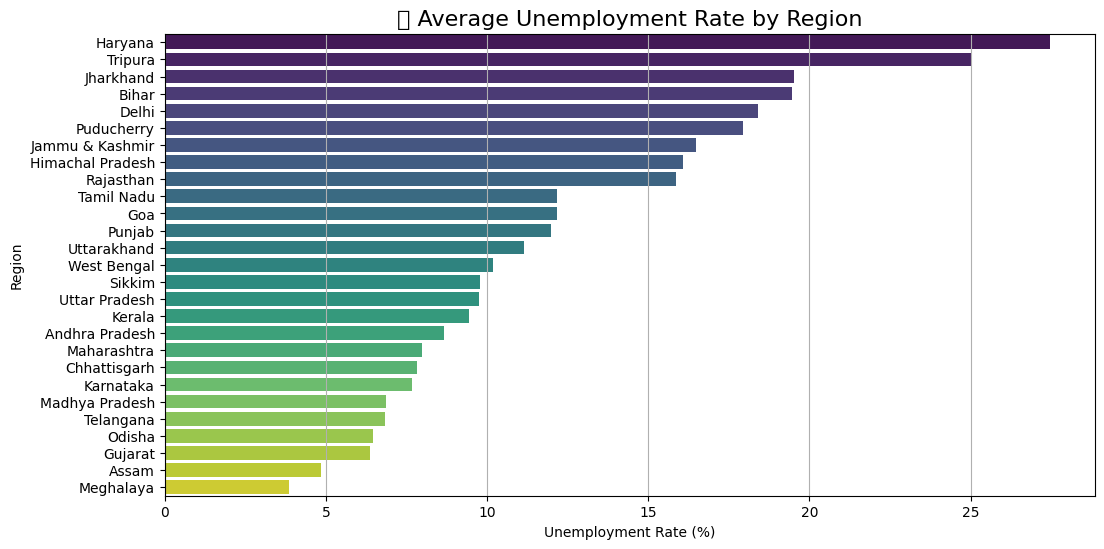

In [ ]:
# Group the data by region and take the average unemployment rate
region_unemployment = df.groupby('region')['estimated_unemployment_rate_%'].mean().sort_values(ascending=False)

# Create a barplot
plt.figure(figsize=(12,6))
sns.barplot(x=region_unemployment.values, y=region_unemployment.index, palette='viridis')
plt.title('📊 Average Unemployment Rate by Region', fontsize=16)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.grid(axis='x')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


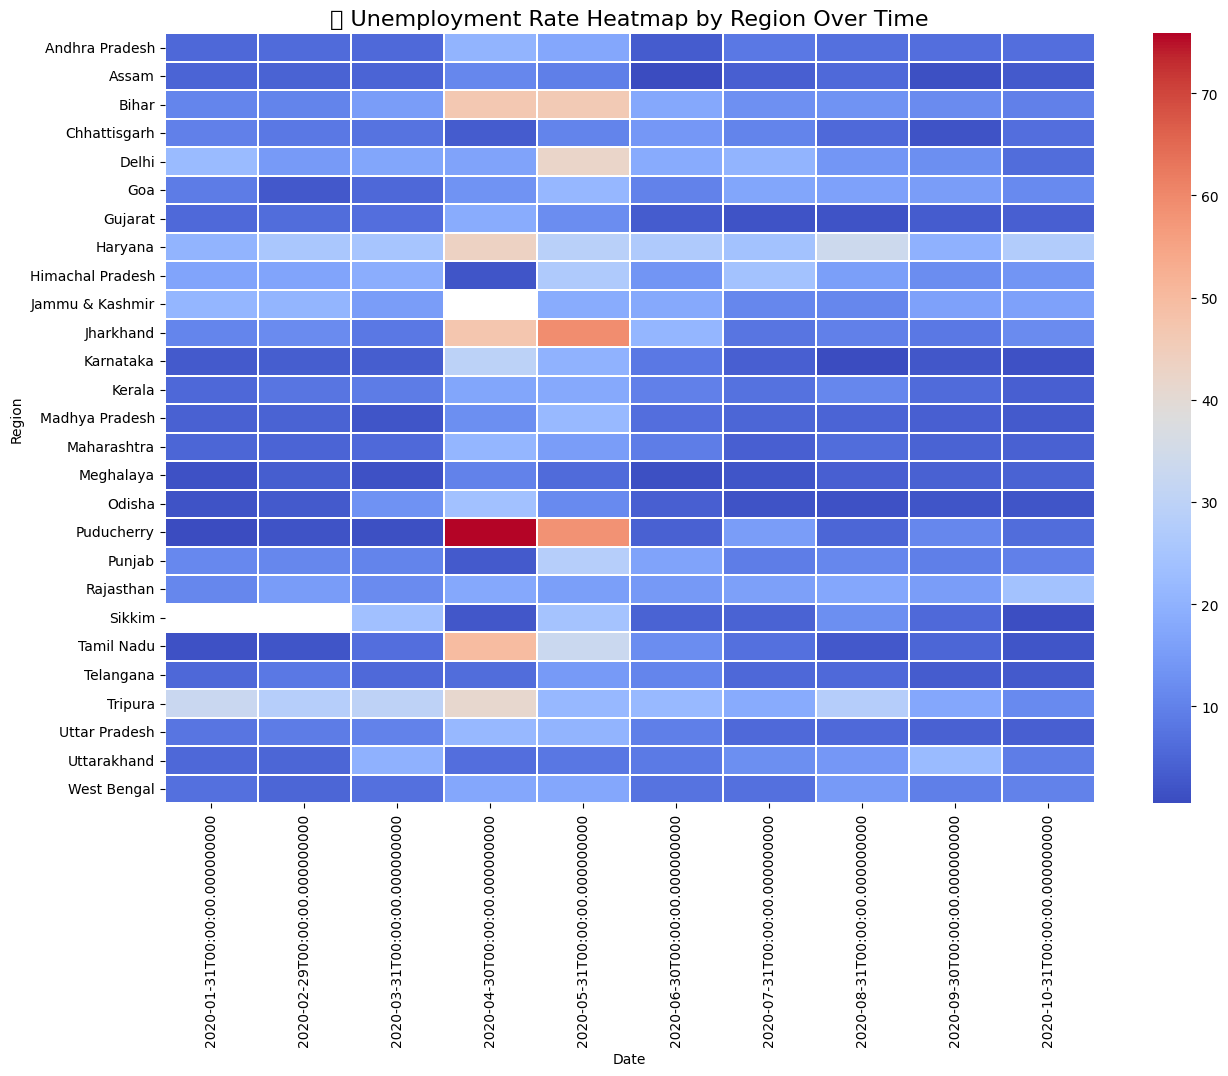

In [ ]:
# Create a pivot table for heatmap
heatmap_data = df.pivot_table(index='region', columns='date', values='estimated_unemployment_rate_%')

# Create the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(heatmap_data, cmap='coolwarm', linecolor='white', linewidths=0.1)
plt.title('🔥 Unemployment Rate Heatmap by Region Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Region')
plt.show()
